# Математичекая Статистика
## Лабораторная Работа №3 «Статистические Гипотезы», Вариант 5

Румянцев Алексей Александрович, 368731, Поток Мат Стат 31.2

### Условие задания

Для каждой проблемы нужно провести два статистических теста, если не сказано иное, причем первый из критериев нужно реализовать самостоятельно (считать и выводить значение статистики, критическое значение, `p-value`), в качестве второго можно воспользоваться готовой реализацией. Также нужно отдельно указывать, как формализуются $H_0$ и $H_1$ для выбранных тестов. Уровень значимости выбираете сами.

В файле [`song_data.csv`](https://drive.google.com/file/d/1KRbKtVb6Xkyc8_2gKT9G6N5N_yD7FQXC/view) представлены данные о музыкальных произведениях
1. Предположите с каким вероятностным законом распределен рейтинг песни. С помощью стат. теста подтвердите/опровергните это предположение.
2. Верно ли, что распределение рейтинга у коротких и длинных песен одинаково (порог продолжительности выбирайте сами)?
3. Верно ли, что рейтинг и танцевальность связаны?

### Выполнение

Зададим функцию, которая будет определять, исходя из условия, принимаем мы нулевую гипотезу или нет [Источник 5](http://www.mathprofi.ru/koefficient_rangovoy_korrelyacii_spirmena.html), [Источник 6](https://univer-nn.ru/ekonometrika/test-spirmena/)

In [105]:
ACCEPT = "Accept null hypothesis"
REJECT = "Reject null hypothesis with respect to given alternative"

def print_reject_or_accept(condition):
  if condition:
    print(REJECT)
  else:
    print(ACCEPT)

Импортируем библиотеки для поиска пути к файлу с данными и работы с таблицами. Файл `song_data.csv` нужно держать в одной папке с файлом `<lab_3>.ipynb`. Это нужно для того, чтобы программа работала при любых абсолютных путях. Выведем считанную таблицу

In [106]:
from pathlib import Path
import os

import pandas as pd


path = Path().resolve()
filename = 'song_data.csv'
data = pd.read_csv(os.path.join(path, filename))
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


**Пункт 1**. Предположим, что рейтинг песен распределен нормально. Так как имеем большое количество независимых случайных величин, то по умолчанию предполагаем, что данные распределены нормально. Гипотезы будут иметь вид $$H_0\text{ -- рейтинг песен подчиняется нормальному распределению}$$ $$H_1\text{ -- рейтинг песен не подчиняется нормальному распределению}$$ Проверим наше предположение статистическим тестом [«Критерий хи-квадрат (Пирсона)»](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82). Это односторонний тест (сумма квадратов не может быть отрицательной). Нам понадобится сравнить эмпирическое распределение с теоретическим. Для начала считаем столбец с рейтингом. Выведем количество песен в таблице, равное длине столбца рейтинга

In [107]:
ratings = data['song_popularity']
n = len(ratings)
n

18835

Следуем алгоритму. Необходимо разделить отрезок $[a, b]$ на $k$ непересекающихся интервалов $(a_i, b_i],\ i=1...k$. Посчитаем количество интервалов для разделения столбца с рейтингом с помощью правила Стерджеса $k=1+[\log{2n}]$, где $[x]$ целая часть числа $x$. Выведем полученное количество интервалов

In [108]:
import numpy as np

k = int(1 + np.floor(np.log2(n)))
k

15

Далее нужно посчитать количество наблюдений $n_j$ (в коде `empir_freqs`) в $j$-м интервале. Создадим список длины $k$ c равномерно распределенными точками (т. е. границами интервалов) в диапазоне от минимума до максимума из данных по рейтингу -- это наши $k$ непересекающихся интервалов. Для каждого $k_j$ интервала вычислим частоту (и. с. количество значений $n_j$, попавших в интервал). Выведем полученные частоты

In [109]:
intervals = np.linspace(ratings.min(), ratings.max(), k + 1)
empir_freqs, bins = np.histogram(ratings, bins=intervals)
empir_freqs

array([ 802,  470,  497,  733,  908, 1080, 1796, 2391, 2137, 2572, 2329,
       1419,  863,  528,  310], dtype=int64)

Частоты, зависящие от рейтинга, и будут нашим эмпирическим распределением. Обозначим его как $F^*(x)$. Построим график этого распределения

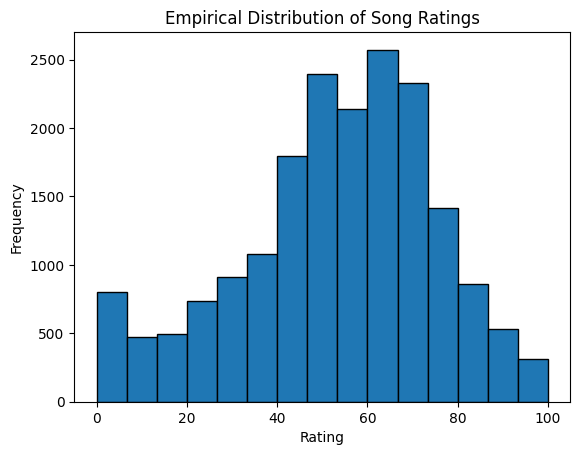

In [110]:
import matplotlib.pyplot as plt


bin_width = bins[1] - bins[0]
plt.bar(bins[:-1], empir_freqs, width=bin_width, edgecolor='black', align='edge')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Song Ratings')
plt.show()

Распределение не похоже на нормальное из-за высокого скачка вначале и большого провала в середине. Однако посмотрим, что покажет статистический тест. Необходимо найти теоретическое распределение. Для этого вычислим теоретические частоты $E_j$ (ожидаемое число попаданий в $j$-ый интервал) как $$E_j=np_j,\ \ p_j=\Phi\left(b_j\right)-\Phi\left(a_j\right)$$ Здесь $p_j$ -- вероятность попадания наблюдения в $j$-ый интервал при выполнении гипотезы $H_0^*:X^n$ порождается функцией $F^*(x)$, $n$ -- размер выборки, $\Phi(x)$ -- функция распределения. В нашем случае теоретическое распределение -- [нормальное](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5), а значит подсчет вероятности будет иметь вид $$p_j=\Phi\left(\dfrac{x_{j+1}-\mu}{\sigma}\right)-\Phi\left(\dfrac{x_{j}-\mu}{\sigma}\right)$$ Нам неизвестно математическое ожидание и стандартное отклонение нормального распределения для наших данных, поэтому мы оценим эти два параметра, взяв в качестве $\mu_{theor}$ и $\sigma_{theor}$ соответственно $\mu_{empir}$ и $\sigma_{empir}$, которые посчитаем по нашему эмпирическому распределению. Выведем эти значения

In [111]:
mu, sigma = ratings.mean(), ratings.std()
print(f'mu={mu}, sigma={sigma}')

mu=52.99187682505973, sigma=21.905654321614236


Теперь для каждого интервала рассчитаем ожидаемое число попаданий значений, пользуясь формулами, приведенными ранее. После цикла нормализуем значения, чтобы количество ожидаемых частот равнялось количеству эмпирических частот, а значит и размеру выборки $n$. Это гарантирует, что сравнение основано на форме распределений, а не на разнице в размере выборок. Выведем полученные теоретические частоты

In [112]:
import scipy.stats as st


theor_freqs = []
for j in range(len(bins) - 1):
    p_j = st.norm.cdf(bins[j + 1], loc=mu, scale=sigma) - \
          st.norm.cdf(bins[j], loc=mu, scale=sigma)
    E_j = n * p_j
    theor_freqs.append(E_j)
theor_freqs = theor_freqs / np.sum(theor_freqs) * n

np.array(theor_freqs)

array([ 182.23044399,  345.14003266,  596.27889173,  939.69034601,
       1350.83594602, 1771.34843346, 2118.79873513, 2311.85314944,
       2300.99600451, 2089.08712898, 1730.14313228, 1307.04868449,
        900.70992184,  566.18782119,  324.65132827])

Проверим равенство сумм теоретических и эмпирических частот

In [113]:
sum_empir = np.sum(empir_freqs)
sum_theor = np.sum(theor_freqs)
print(f'sum_equality={sum_empir == sum_theor}, sum_equals_check={sum_empir == n}, sum_empir={sum_empir}')

sum_equality=True, sum_equals_check=True, sum_empir=18835


Построим график полученного теоретического распределения. Так как мы ожидаем нормальное распределение, то и увидим нормальное распределение

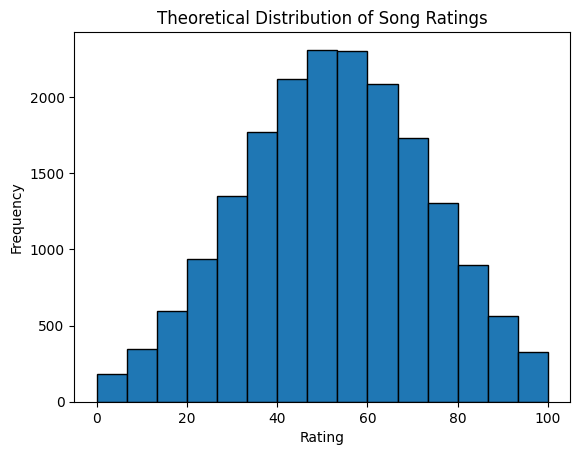

In [114]:
plt.bar(bins[:-1], theor_freqs, width=bin_width, edgecolor='black', align='edge')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Theoretical Distribution of Song Ratings')
plt.show()

Посчитаем статистику. Для критерия хи-квадрат она имеет вид $$\chi^2=\sum\limits_{j=1}^{k}\dfrac{\left(n_j-E_j\right)^2}{E_j}\sim\chi^2\left(k-1\right)$$ Здесь $k-1$ -- степени свободы. Выведем полученную статистику

In [115]:
chi2_score = np.sum((empir_freqs - theor_freqs) ** 2 / theor_freqs)
chi2_score

3026.907637036789

Статистика получилась очень большой. Для сравнения: значение `p_value` меняется от $\approx 1$ до $\approx 0$ при значении статистики $\approx 0<\chi^2<\approx 20$. Похоже, что в нашем случае рейтинг не имеет нормальное распределение. Продолжим статистический тест. Для нахождения критического значения хи-квадрат нужно определить количество степеней свободы. В обычном случае оно равно $k - 1$, но мы оценили два параметра (математическое ожидание и стандартное отклонение), а значит нужно дополнительно вычесть количество оцененных параметров `p = 2` (потеря информации при оценивании параметра). Выведем количество степеней свободы

In [116]:
p = 2
df = (k - 1) - p
df

12

Зададим уровень значимости $\alpha=0.05$. Смотрим в [таблицу](https://cdn.scribbr.com/wp-content/uploads/2022/05/chi-square-distribution-table.png) по `df` и `alpha=0.05` и получаем критическое значение статистики хи-квадрат. Уже на этом этапе мы можем решить, принимать ли нам нулевую гипотезу (сравнение `p_value` с уровнем значимости `alpha` дает более точный результат). Если значение нашей статистики больше критического, то нулевую гипотезу мы отклоняем. Воспользуемся функцией, написанной ранее, чтобы увидеть результат проверки по $\chi^2_{crit}$

In [117]:
alpha = 0.05
crit_chi2 = 21.026
print(f'crit_chi2={crit_chi2}')
print_reject_or_accept(chi2_score > crit_chi2)

crit_chi2=21.026
Reject null hypothesis with respect to given alternative


Значение нашей статистики велико, поэтому результат ожидаемый, а дальнейшие выводы предсказуемы. Посчитаем и выведем `p_value`

In [118]:
p_value = 1 - st.chi2.cdf(chi2_score, df)
p_value

0.0

Значение `p_value` оказалось настолько мало, что программа округлила его до нуля. Выведем результат проверки нулевой гипотезы по `p_value`

In [119]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative


Наше `p` значение меньше уровня значимости, а значит **нулевую гипотезу $H_0$ отвергаем**. Проверим наши выводы с помощью встроенной в библиотеку функции `chisquare`: выведем статистику, `p`-значение, $\chi^2_{crit}$ и результат проверки гипотезы

In [173]:
alpha = 0.05
stat, p_value = st.chisquare(empir_freqs, theor_freqs)
crit_chi2_ = st.chi2.ppf(1 - alpha, df)
print(f'chi2_score={stat}, p_value={p_value}, crit_chi2={crit_chi2_}')
print_reject_or_accept(stat > crit_chi2_)
print_reject_or_accept(p_value < alpha)

chi2_score=3026.907637036789, p_value=0.0, crit_chi2=21.02606981748307
Reject null hypothesis with respect to given alternative
Reject null hypothesis with respect to given alternative


Как видим, все значения совпали, значит наш тест вручную корректен. Выходит, что для наших данных распределение рейтинга не подчиняется нормальному вероятностному закону. Наложим два распределения друг на друга на одном графике для наглядного сравнения

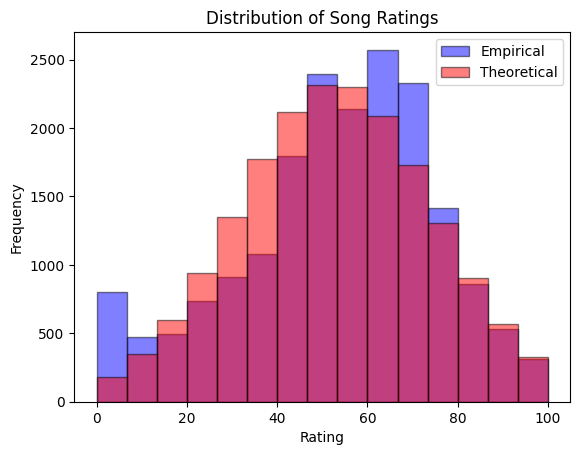

In [121]:
plt.bar(bins[:-1], empir_freqs, width=bin_width, alpha=0.5, label="Empirical", color="blue", edgecolor='black', align='edge')
plt.bar(bins[:-1], theor_freqs, width=bin_width, alpha=0.5, label="Theoretical", color="red", edgecolor='black', align='edge')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Song Ratings')
plt.legend(loc='best')
plt.show()

По критерию согласия Пирсона наше распределение было бы нормальным, если разница между высотой столбцов эмпирического и теоретического распределений была маленькой, как на промежутке $[80, 100]$, однако мы имеем значительную разницу на промежутке $[0, 80)$, поэтому значение статистики получилось большим, а значение `p` маленьким

Проведем второй статистический тест [«Критерий Колмогорова-Смирнова»](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0-%D0%A1%D0%BC%D0%B8%D1%80%D0%BD%D0%BE%D0%B2%D0%B0). Статистика данного критерия имеет вид $$D_n=\sup_x|F_n(x)-F(x)|$$ Здесь $F_n(x)$ -- эмпирическая функция распределения, $F(x)$ -- некоторая «истинная» функция распределения с известными параметрами. Критическое значение можно найти по [формуле](https://cf.ppt-online.org/files/slide/r/RvMnjlWVNOgb9iru45FKhJt7Xcf1wGx6oaQSLP/slide-20.jpg) $$D_{crit}=\dfrac{\lambda_{crit}}{\sqrt{n-1}},$$ где $\lambda_{crit}$ можно найти из таблицы
| $\alpha$ | 0.4 | 0.3 | 0.2 | 0.1 | 0.05 | 0.025 | 0.01 | 0.005 | 0.001 | 0.0005 |
|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| $\lambda_{crit}$    | 0.89    | 0.97 | 1.07 | 1.22 | 1.36 | 1.48 | 1.63 | 1.73 | 1.95 | 2.03 |

В нашем случае оставим уровень значимости в 5%, тогда $\lambda_{crit}=1.36$; теоретическое распределение нормальное, зададим параметры $\mu_{empir}$ и $\sigma_{empir}$, тест двусторонний. Выведем статистику, `p`-значение и $D_{crit}$. Проверим нулевую гипотезу

In [171]:
alpha = 0.05
stat, p_value = st.kstest(ratings, 'norm', args=(mu, sigma), alternative='two-sided')
crit_lambda = 1.36
crit_d = crit_lambda / np.sqrt(n - 1)
print(f'stat={stat}, p_value={p_value}, crit_d={crit_d}')
print_reject_or_accept(stat > crit_d)
print_reject_or_accept(p_value < alpha)

stat=0.06170357136267912, p_value=8.782641743221739e-63, crit_d=0.009909862423925143
Reject null hypothesis with respect to given alternative
Reject null hypothesis with respect to given alternative


По результатам теста **отвергаем нулевую гипотезу $H_0$**. Значение `p` снова получилось очень маленьким

**Пункт 2**. Для нас, как для инопланетянина, между распределениями рейтинга коротких и длинных песен нет разницы. Гипотезы будут иметь вид $$H_0\text{ -- распределения рейтинга коротких и длинных песен одинаковы}$$ $$H_1\text{ -- распределения рейтинга коротких и длинных песен различны}$$ В данном задании результат сильно зависит от выбранного порога, по которому мы определяем, короткая песня или длинная. Сбалансируем количество коротких и длинных песен в группах, выбрав в качестве порога медиану по данным продолжительности песен. Выведем размеры получившихся групп

In [123]:
duration = data['song_duration_ms']

threshold = np.median(duration)
short_songs_ratings = ratings[duration <= threshold]
long_songs_ratings = ratings[duration > threshold]

print(f'len_short={len(short_songs_ratings)}, len_long={len(long_songs_ratings)}')

len_short=9419, len_long=9416


Коротких песен получилось немного больше. Построим для наглядности график распределений двух групп. Частоты ищем аналогично поиску эмпирических частот в первом пункте, количество интервалов определяем минимумом из значений количества интервалов для обеих групп, определенных правилом Стерджеса

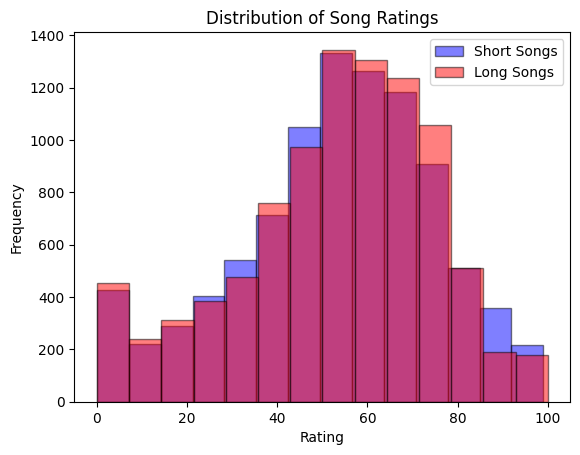

In [124]:
n_bins = min(int(1 + np.floor(np.log2(len(short_songs_ratings)))), int(1 + np.floor(np.log2(len(long_songs_ratings)))))
plt.hist(short_songs_ratings, bins=n_bins, alpha=0.5, label="Short Songs", color='blue', edgecolor='black')
plt.hist(long_songs_ratings, bins=n_bins, alpha=0.5, label="Long Songs", color='red', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Song Ratings')
plt.legend(loc='best')
plt.show()

Проверять будем статистическим тестом [«Критерий Уилкоксона-Манна-Уитни»](http://machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A3%D0%B8%D0%BB%D0%BA%D0%BE%D0%BA%D1%81%D0%BE%D0%BD%D0%B0-%D0%9C%D0%B0%D0%BD%D0%BD%D0%B0-%D0%A3%D0%B8%D1%82%D0%BD%D0%B8). Гипотезы можно переписать в математическом виде $$H_0: P\{x<y\}=\dfrac{1}{2}$$ $$H_1: P\{x<y\}\neq\dfrac{1}{2}$$ Иными словами, при выполнении гипотезы $H_0$ значения из двух выборок нельзя систематически различить. По алгоритму нам необходимо построить общий вариационный ряд объединенной выборки $x^{(1)}\leq...\leq x^{(m_1+m_2)}$ и найти ранг $r(x_i),\ r(y_i)$ всех элементов обеих выборок в общем вариационном ряду. Благодаря библиотечной функции `rankdata` можно пропустить сортировку элементов и сразу получить список с дробными рангами для каждого значения. Дробные ранги появляются при наличии повторяющихся значений в вариационном ряду. Выведем полученные ранги

In [125]:
combined_ratings = np.concatenate((short_songs_ratings, long_songs_ratings))
ranks = st.rankdata(combined_ratings)
ranks

array([17362.5, 17362.5, 16867.5, ..., 13539.5, 12487.5,  9219.5])

Далее нужно вычислить суммарные ранги обеих выборок $$R_x=\sum\limits_{i=1}^{m_1}r(x_i),\ \ R_y=\sum\limits_{i=1}^{m_2}r(y_i)$$ Разделим общий список рангов на ранги коротких и длинных песен и воспользуемся функцией `sum`. Индексы не изменились вследствие реализации функции `rankdata`. Выведем полученные суммы `r_short` и `r_long`

In [126]:
ranks_short = ranks[:len(short_songs_ratings)]
ranks_long = ranks[len(short_songs_ratings):]

r_short = np.sum(ranks_short)
r_long = np.sum(ranks_long)

print(f'R_short={r_short}, R_long={r_long}')

R_short=88207355.0, R_long=89180675.0


Вычислим статистику Манна-Уитни $$U=\min{\left(U_x,U_y\right)}$$ $$U_x=m_1m_2+\dfrac{1}{2}m_1(m_1+1)-R_x,\ \ U_y=m_1m_2+\dfrac{1}{2}m_2(m_2+1)-R_y$$ Здесь $m_1$ -- размер первой выборки, $m_2$ -- второй. Выведем полученную статистику

In [127]:
m_1 = len(short_songs_ratings)
m_2 = len(long_songs_ratings)

u_short = m_1 * m_2 + 0.5 * m_1 * (m_1 + 1) - r_short
u_long = m_1 * m_2 + 0.5 * m_2 * (m_2 + 1) - r_long

u_score = min(u_short, u_long)
u_score

43843865.0

Найдем критическое значение $U_{crit}$. Для больших выборок статистика $U$ распределена приблизительно нормально ([«использование критерия п. 5»](https://ru.wikipedia.org/wiki/U-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9C%D0%B0%D0%BD%D0%BD%D0%B0_%E2%80%94_%D0%A3%D0%B8%D1%82%D0%BD%D0%B8)). В таком случае критическое значение статистики Манна-Уитни будет определяться как соответствующее критическому значению $Z$, то есть $$U_{crit,\pm}=\mu_U\pm z_{1-\frac{\alpha}{2}}\cdot\sigma_U$$ Напоминание: вследствие симметричности нормального распределения $z_{\frac{\alpha}{2}}=-z_{1-\frac{\alpha}{2}}$. Так как наш тест двусторонний, то у нас будет два критических значения -- нижняя критическая точка $U_{crit,-}$ (левая граница) -- определяет, попадает ли значение статистики $U$ в нижние $\alpha/2$ процента распределения, и верхняя критическая точка $U_{crit,+}$ (правая граница) -- определяет, попадает ли в верхние. Значение статистики попадет в критическую область, если $$\begin{align}\left[\begin{array}{ll}U<U_{crit,-}\\ U>U_{crit,+}\end{array}\right . \end{align}$$ Если же статистика окажется между критическими значениями $$U_{crit,-}\leq U\leq U_{crit,+},$$ то она будет находиться в зоне, соответствующей нулевой гипотезе, то есть у нас не будет оснований отвергать $H_0$. Проведем расчеты. Необходимо найти матожидание и стандартное отклонение. Если нулевая гипотеза верна, то критерий имеет математическое ожидание $$M\left(U\right)=\dfrac{m_1m_2}{2}=\mu_U$$ и дисперсию $$D\left(U\right)=\dfrac{m_1m_2\left(m_1+m_2+1\right)}{12}=\sigma_U^2$$ Посчитаем и выведем матожидание

In [128]:
mean_u = m_1 * m_2 / 2
mean_u

44344652.0

Посчитаем и выведем стандартное отклонение (корень из дисперсии)

In [129]:
std_u = np.sqrt(m_1 * m_2 * (m_1 + m_2 + 1) / 12)
std_u

373112.106716824

Оставим уровень значимости 5%, в таком случае по таблице получаем квантиль нормального распределения $z_{1-\frac{\alpha}{2}}=1.96$. Посчитаем и выведем критические значения $U_{crit,\pm}$

In [130]:
alpha = 0.05
z_1m_alpha2 = 1.96
crit_u_m = mean_u - z_1m_alpha2 * std_u
crit_u_p = mean_u + z_1m_alpha2 * std_u
print(f'U_crit-={crit_u_m}, U_crit+={crit_u_p}')

U_crit-=43613352.27083503, U_crit+=45075951.72916497


Проверим, отвергаем ли мы нулевую гипотезу

In [131]:
print_reject_or_accept((u_score < crit_u_m) or (u_score > crit_u_p))

Accept null hypothesis


Значение статистики $U$ находится между нижней и верхней критическими точками, а значит нулевая гипотеза не отвергается. Далее найдем `p_value` -- оно даст более точный результат. Мы уже упомянали, что критерий Манна-Уитни на больших выборках примерно нормально распределен. Тогда, найдем `p_value` через $Z$ статистику, к которой приведем статистику $U$ следующей формулой $$Z=\dfrac{U-\mu_U}{\sigma_U}\sim\mathcal{N}\left(0,1\right)$$ В расчете `p_value` нужно учесть, что тест двусторонний, поэтому берем $|Z|$ и две разницы единицы и функции распределения стандартного нормального распределения. Выведем полученное значение `p_value`

In [132]:
z_score = (u_score - mean_u) / std_u
p_value = 2 * (1 - st.norm.cdf(abs(z_score)))
p_value

0.17953469213683615

Проверим, отвергаем ли мы нулевую гипотезу

In [133]:
print_reject_or_accept(p_value < alpha)

Accept null hypothesis


Следовательно, мы принимаем нулевую гипотезу $H_0$. Проверим наши рассуждения библиотечным методом `mannwhitneyu` -- выведем статистику, значение `p` и критические значения статистики

In [172]:
stat, p_value = st.mannwhitneyu(short_songs_ratings, long_songs_ratings, alternative='two-sided')
z_1m_alpha2 = st.norm.ppf(1 - alpha / 2)
crit_u_m = mean_u - z_1m_alpha2 * std_u
crit_u_p = mean_u + z_1m_alpha2 * std_u
print(f'u_score={stat}, p_value={p_value}, U_crit-={crit_u_m}, U_crit+={crit_u_p}')
print_reject_or_accept((stat < crit_u_m) or (stat > crit_u_p))
print_reject_or_accept(p_value < alpha)

u_score=43843865.0, p_value=0.17948669975010156, U_crit-=43613365.70863916, U_crit+=45075938.29136084
Accept null hypothesis
Accept null hypothesis


Результаты подтвердились. Таким образом, исходя из наших данных и заданного порога, у нас нет оснований полагать, что распределения рейтинга коротких и длинных песен различны -- мы **принимаем гипотезу $H_0$**

Проверим другим статистическим тестом [«Двухвыборочный критерий Колмогорова-Смирнова»](http://machinelearning.ru/wiki/index.php?title=%D0%94%D0%B2%D1%83%D1%85%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0-%D0%A1%D0%BC%D0%B8%D1%80%D0%BD%D0%BE%D0%B2%D0%B0). Гипотезы остаются такими же, можно записать их в математическом виде $$H_0: G(x)=F(x)$$ $$H_1: G(x)\neq F(x)$$ Здесь $F(x)$ и $G(x)$ -- функции распределения случайных величин $x_i$ и $y_i$. Рассмотрим $$D_{m1,m2}=\sup_{|x|<\infty}|G_{m1}(x)-F_{m2}(x)|$$ Величина $D_{m1,m2}$ называется двухвыборочной статистикой Колмогорова-Смирнова. $F_{m2}(x)$ и $G_{m1}(x)$ -- эмпирические функции распределения указанных выборок размерностей $m_2$ и $m_1$ соответственно. Критическое значение $D_{crit}$ выведем из формулы ([источник](https://thepresentation.ru/uncategorized/kriteriy-kolmogorovasmirnova)) $$\lambda=D_{max}\sqrt{\dfrac{m_1m_2}{m_1+m_2}}$$ Здесь $\lambda$ -- нормализованное значение статистики. Тогда для $D_{max}$ критическим значением будет $$D_{crit}=\dfrac{\lambda_{crit}}{\sqrt{\dfrac{m_1m_2}{m_1 + m_2}}}$$ Гипотеза $H_0$ отклоняется при $D_{max} > D_{crit}$. Значение $\lambda_{crit}$ возьмем из таблицы, приведенной в первом пункте для второго статистического теста. Уровень значимости оставляем 5%. Выведем статистику, `p`-значение, критическое значение и проверку гипотезы

In [ ]:
alpha = 0.05
stat, p_value = st.ks_2samp(short_songs_ratings, long_songs_ratings, alternative='two-sided')
crit_lambda = 1.36
crit_d = crit_lambda / np.sqrt(m_1 * m_2 / (m_1 + m_2))
print(f'stat={stat}, p_value={p_value}, crit_d={crit_d}')
print_reject_or_accept(stat > crit_d)
print_reject_or_accept(p_value < alpha)

stat=0.023314310821516877, p_value=0.011691247497192433, crit_d=0.019819198951443552
Reject null hypothesis with respect to given alternative
Reject null hypothesis with respect to given alternative


При 5%-ом уровне значимости нулевая гипотеза отвергается. Поменяем уровень значимости до 1%-ого и проверим результат

In [ ]:
alpha = 0.01
crit_lambda = 1.63 # check table
crit_d = crit_lambda / np.sqrt(m_1 * m_2 / (m_1 + m_2))
print_reject_or_accept(stat > crit_d)
print_reject_or_accept(p_value < alpha)

Accept null hypothesis
Accept null hypothesis


При уровне значимости $\alpha=0.1$ нулевая гипотеза не отвергается данным статистическим тестом

**Пункт 3**. $H_0$ -- не связаны

In [137]:
danceability = data['danceability']

ranks_ratings = st.rankdata(ratings)
ranks_danceability = st.rankdata(danceability)

sum_ranks_ratings = np.sum(ranks_ratings)
sum_ranks_danceability = np.sum(ranks_danceability)

check = (n + 1) * n / 2
print(f'sum_equality={sum_ranks_ratings == sum_ranks_danceability}, sum_equals_check={sum_ranks_ratings == check}, sum={sum_ranks_ratings}')

sum_equality=True, sum_equals_check=True, sum=177388030.0


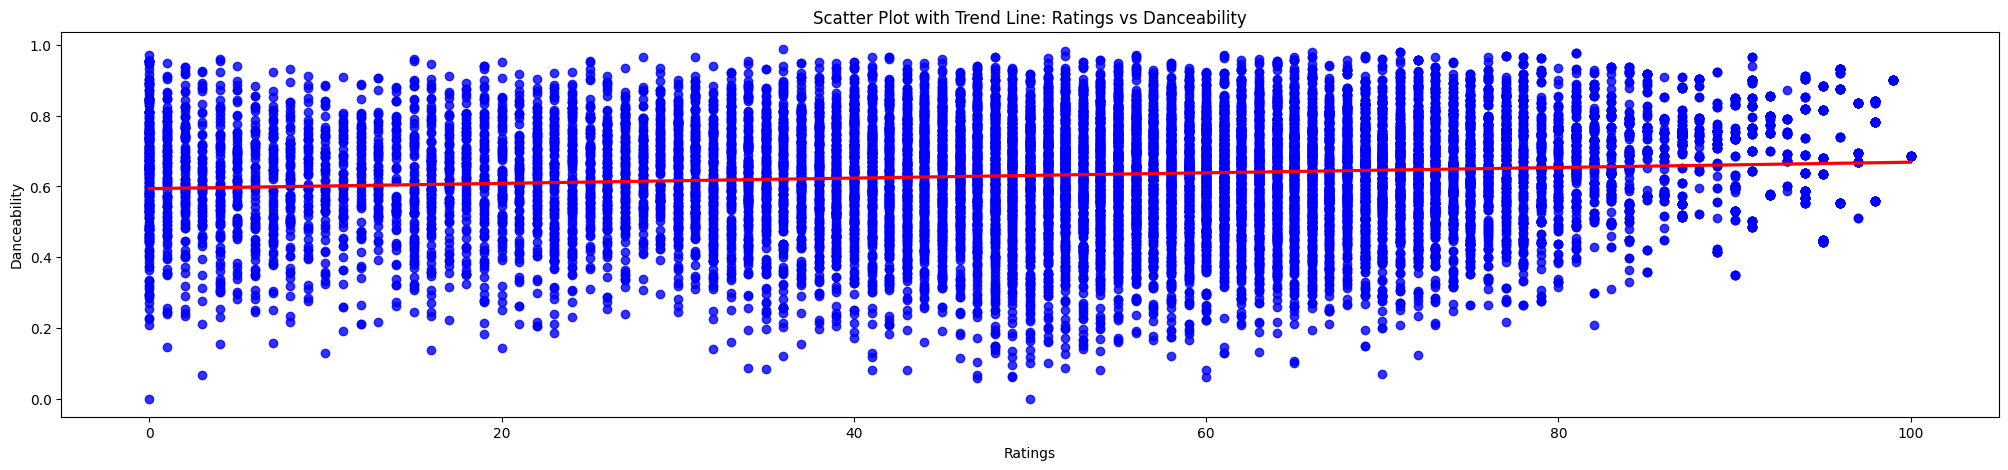

In [138]:
import seaborn as sns


plt.figure(figsize=(25, 5))
sns.regplot(x=ratings, y=danceability, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Scatter Plot with Trend Line: Ratings vs Danceability')
plt.xlabel('Ratings')
plt.ylabel('Danceability')

plt.show()

In [139]:
d = ranks_ratings - ranks_danceability
r_s = 1 - 6 * np.sum(d ** 2) / (n * (n ** 2 - 1))
r_s

0.10133749503700062

In [140]:
t_score = r_s * np.sqrt((n - 2) / (1 - r_s ** 2))
t_score

13.978848382944223

Тест двусторонний (!)

In [141]:
alpha = 0.01
crit_t = st.t.ppf(1 - alpha / 2, df)
crit_t

3.0545395893929017

In [142]:
print_reject_or_accept(t_score > crit_t)

Reject null hypothesis with respect to given alternative


In [143]:
df_ = n - 2
p_value = 2 * (1 - st.t.cdf(abs(t_score), df_))
p_value

0.0

In [144]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative


Односторонний тест на положительную корреляцию (рейтинг растет с ростом танцевальности). H_1 -- корреляция положительна

In [145]:
crit_t_one_sided = st.t.ppf(1 - alpha, df)
crit_t_one_sided

2.680997993130055

In [146]:
print_reject_or_accept(t_score > crit_t)

Reject null hypothesis with respect to given alternative


In [147]:
p_value_one_sided = 1 - st.t.cdf(abs(t_score), df)
p_value_one_sided

4.339782644358081e-09

In [148]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative


Проверка библиотекой

Крит t как приближение z

In [149]:
alpha = 0.01
rho, p_value = st.spearmanr(ratings, danceability, alternative='two-sided')
crit_z = st.norm.ppf(1 - alpha / 2)
print(f'r_s={rho}, p_value={p_value}, crit_t={crit_z}')
print_reject_or_accept(p_value < alpha)

r_s=0.10123555201396331, p_value=4.251510400487118e-44, crit_t=2.5758293035489004
Reject null hypothesis with respect to given alternative


In [150]:
alpha = 0.01
rho, p_value = st.spearmanr(ratings, danceability, alternative='greater')
crit_z = st.norm.ppf(1 - alpha)
print(f'r_s={rho}, p_value={p_value}, crit_t={crit_z}')
print_reject_or_accept(p_value < alpha)

r_s=0.10123555201396331, p_value=2.125755200243559e-44, crit_t=2.3263478740408408
Reject null hypothesis with respect to given alternative


Другой стат. тест (крит. знач. тоже z)

In [151]:
alpha = 0.01
tau, p_value = st.kendalltau(ratings, danceability, alternative='two-sided')
crit_z = st.norm.ppf(1 - alpha / 2)
print(f'tau={tau}, p_value={p_value}, crit_z={crit_z}')
print_reject_or_accept(p_value < alpha)

tau=0.06841180008844917, p_value=2.255916082084472e-44, crit_z=2.5758293035489004
Reject null hypothesis with respect to given alternative


In [152]:
alpha = 0.01
tau, p_value = st.kendalltau(ratings, danceability, alternative='greater')
crit_z = st.norm.ppf(1 - alpha)
print(f'tau={tau}, p_value={p_value}, crit_z={crit_z}')
print_reject_or_accept(p_value < alpha)

tau=0.06841180008844917, p_value=1.127958041042236e-44, crit_z=2.3263478740408408
Reject null hypothesis with respect to given alternative
